<a href="https://colab.research.google.com/github/dmorton714/pandas_demo/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from sqlite3 import connect

# Explanation of Python Packages

## pandas
- **Purpose:** Pandas is a versatile library for data manipulation and analysis.
- **Description:** It provides easy-to-use data structures (e.g., DataFrame) and tools for cleaning, filtering, and summarizing structured data.

## requests
- **Purpose:** The `requests` package simplifies the process of sending HTTP requests.
- **Description:** It enables Python programs to interact with web services by making it easy to send GET, POST, and other types of HTTP requests and handle the responses.

## json
- **Purpose:** The `json` module facilitates working with JSON data.
- **Description:** JSON is a common data interchange format, and this module allows Python programs to encode (convert to JSON) or decode (convert from JSON) data effortlessly.

## numpy
- **Purpose:** Numpy is a library for numerical operations in Python.
- **Description:** It supports large, multi-dimensional arrays and matrices, along with mathematical functions for scientific and data-related applications.

## seaborn
- **Purpose:** Seaborn is a data visualization library built on top of Matplotlib.
- **Description:** It simplifies the process of creating attractive and informative statistical graphics, making it easy to generate eye-catching charts and graphs with minimal code.

## sqlite3
- **Purpose:** The `sqlite3` module provides a simple way to work with SQLite databases.
- **Description:** SQLite is a lightweight, file-based database, and the `sqlite3` module enables Python programs to connect to and interact with these databases.

In summary, these packages cover a broad spectrum of tasks, from handling data to making web requests, working with numerical data, creating visualizations, and interacting with databases. Using these packages can significantly enhance your ability to accomplish various programming tasks without having to write everything from scratch.


# API Import
In this example, we efficiently retrieve and import data into a DataFrame through a systematic pagination approach. This method ensures that we retrieve the data in manageable chunks, optimizing the process of populating our DataFrame.

In [31]:
url = 'https://rickandmortyapi.com/api/character'
results = []
page = 1

while True:
    response = requests.get(f'{url}?page={page}')
    data = response.json()

    if 'results' in data and len(data['results']) > 0:
        results.extend(data['results'])
        page += 1
    else:
        break

df = pd.DataFrame(results)

df.to_csv('rick_n_morty.csv')

## Explaining API calls high level

Imagine you have a big box of toys, and these toys are characters from a show called "Rick and Morty." But there are so many characters that you can't see them all at once.

Now, you want to organize these toys, but looking at all of them together is too much. So, [link text](https://)you decide to look at a few toys at a time, like flipping through pages in a book. Each time you flip a page, you see a group of characters.

In the computer world, this is similar. The characters are stored on the internet, and you have a special tool (a program) that helps you bring a few characters at a time (a page) and puts them in a list (results). Then, you look at the next page, and the next, until you have all the characters.

Finally, you take all the characters you collected and put them in a neat table (DataFrame) so you can easily see and play with them. Now you have a list of all the characters from the "Rick and Morty" show!


# reading in a local CSV file

In [32]:
df = pd.read_csv('rick_n_morty.csv')

## Understanding `pd.read_csv('rick_n_morty.csv')`

In the programming world, there's a way to store and organize data neatly in files. A CSV file is one such format, acting like a table with rows and columns.

When you see `pd.read_csv('rick_n_morty.csv')`, it's a command in Python using the Pandas library. It tells the computer to open a file named 'rick_n_morty.csv' that contains organized data.

Pandas reads this file, structures the data, and creates a table-like structure called a DataFrame. This DataFrame allows you to manipulate and analyze the information conveniently. Essentially, you're loading data from a file to explore and work with it using Python.


# Looking at the Data

Lets look at the first 2 rows and the last 2 rows.


In [33]:
# your code here 

,Unnamed: 0,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,0,1,Rick Sanchez,Alive,Human,NaN,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"['https://rickandmortyapi.com/api/episode/1', ...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,1,2,Morty Smith,Alive,Human,NaN,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"['https://rickandmortyapi.com/api/episode/1', ...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z


In [34]:
# your code here 

,Unnamed: 0,id,name,status,species,type,gender,origin,location,image,episode,url,created
824,824,825,Young Jerry,unknown,Human,NaN,Male,"{'name': 'Earth (Unknown dimension)', 'url': '...","{'name': 'Earth (Unknown dimension)', 'url': '...",https://rickandmortyapi.com/api/character/avat...,['https://rickandmortyapi.com/api/episode/51'],https://rickandmortyapi.com/api/character/825,2021-11-02T17:20:14.305Z
825,825,826,Butter Robot,Alive,Robot,Passing Butter Robot,Genderless,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,['https://rickandmortyapi.com/api/episode/9'],https://rickandmortyapi.com/api/character/826,2021-11-02T17:24:37.458Z


List out the columns

In [35]:
# your code here 

Index(['Unnamed: 0', 'id', 'name', 'status', 'species', 'type', 'gender',
       'origin', 'location', 'image', 'episode', 'url', 'created'],
      dtype='object')

What is the shape of the dataframe? (rows and columns)

In [36]:
# your code here 

(826, 13)

What are the data types?

In [38]:
# your code here 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  826 non-null    int64 
 1   id          826 non-null    int64 
 2   name        826 non-null    object
 3   status      826 non-null    object
 4   species     826 non-null    object
 5   type        425 non-null    object
 6   gender      826 non-null    object
 7   origin      826 non-null    object
 8   location    826 non-null    object
 9   image       826 non-null    object
 10  episode     826 non-null    object
 11  url         826 non-null    object
 12  created     826 non-null    object
dtypes: int64(2), object(11)
memory usage: 84.0+ KB


# cleaning

lets drop some columns we don't need

In [ ]:
# List of columns to drop
columns_to_drop = ['origin', 'location', 'image', 'episode', 'url']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

df.head(2)


,Unnamed: 0,id,name,status,species,type,gender,created
0,0,1,Rick Sanchez,Alive,Human,NaN,Male,2017-11-04T18:48:46.250Z
1,1,2,Morty Smith,Alive,Human,NaN,Male,2017-11-04T18:50:21.651Z


convert created column to date time

In [ ]:
df['created'] = pd.to_datetime(df['created'])

lets convert gender to a category.

In [39]:
df['gender'] = df['gender'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  826 non-null    int64 
 1   id          826 non-null    int64 
 2   name        826 non-null    object
 3   status      826 non-null    object
 4   species     826 non-null    object
 5   type        425 non-null    object
 6   gender      826 non-null    bool  
 7   origin      826 non-null    object
 8   location    826 non-null    object
 9   image       826 non-null    object
 10  episode     826 non-null    object
 11  url         826 non-null    object
 12  created     826 non-null    object
dtypes: bool(1), int64(2), object(10)
memory usage: 78.4+ KB


# plot

lets do a quick plot of genders

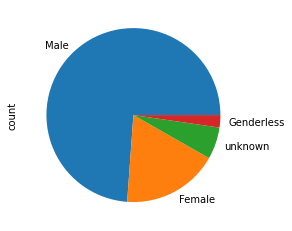

In [ ]:
df['gender'].value_counts().plot.pie();

Make a matplotlib plot of the number of characters created in a month

In [ ]:
# Create a new column 'creation_month' with the month information
df['creation_month'] = df['created'].dt.to_period('M')

# Group by month and count the number of creations
monthly_counts = df['creation_month'].value_counts().sort_index()

#checks the code is correct
df.head(2)

/var/folders/t5/sxblnh9s6r744cwj7y86ts1r0000gn/T/ipykernel_5729/3007797359.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['creation_month'] = df['created'].dt.to_period('M')


,Unnamed: 0,id,name,status,species,type,gender,created,creation_month
0,0,1,Rick Sanchez,Alive,Human,NaN,Male,2017-11-04 18:48:46.250000+00:00,2017-11
1,1,2,Morty Smith,Alive,Human,NaN,Male,2017-11-04 18:50:21.651000+00:00,2017-11


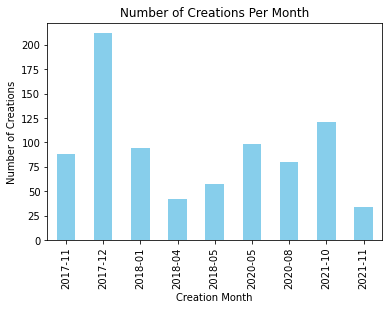

In [ ]:
# Plot the data
monthly_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Creation Month')
plt.ylabel('Number of Creations')
plt.title('Number of Creations Per Month')
plt.show()

# SQL Connect

We will have to convery data types to connect to SQLite

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      826 non-null    int64              
 1   id              826 non-null    int64              
 2   name            826 non-null    object             
 3   status          826 non-null    object             
 4   species         826 non-null    object             
 5   type            425 non-null    object             
 6   gender          826 non-null    category           
 7   created         826 non-null    datetime64[ns, UTC]
 8   creation_month  826 non-null    period[M]          
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4), period[M](1)
memory usage: 52.8+ KB


In [ ]:
# Convert 'created' to string
df['created'] = pd.to_datetime(df['created']).astype(str)

# Convert 'creation_month' to string
df['creation_month'] = df['creation_month'].astype(str)

# Save DataFrame to the existing SQLite connection with explicit data type specification
dtype_mapping = {
    'Unnamed: 0': 'INTEGER',
    'id': 'INTEGER',
    'name': 'TEXT',
    'status': 'TEXT',
    'species': 'TEXT',
    'type': 'TEXT',
    'gender': 'TEXT',
    'created': 'TEXT',
    'creation_month': 'TEXT'
}

conn = connect(':memory:')
# create tables
df.to_sql('df', conn)
# convenient function
def sql(a_string):
    return(pd.read_sql(a_string, conn))

find the number of rows 

In [ ]:
sql("""SELECT COUNT(*) 
    AS row_count 
    FROM df;""")

,row_count
0,826


query to find the name and species of all characters who are alive and male. 

In [ ]:
sql("""SELECT name, species
    FROM df
    WHERE status = 'Alive' AND gender = 'Male';""")

,name,species
0,Rick Sanchez,Human
1,Morty Smith,Human
2,Jerry Smith,Human
3,Antenna Morty,Human
4,Armagheadon,Alien
...,...,...
304,Palicki,Alien
305,Sarge,Alien
306,Ferkusian,Alien
307,Baby Mouse Skin Morty,Human


find the numbers of creations per month

In [ ]:
sql("""SELECT creation_month, 
    COUNT(*) 
    AS creations_per_month
    FROM df
    GROUP BY creation_month;""")

,creation_month,creations_per_month
0,2017-11,88
1,2017-12,212
2,2018-01,94
3,2018-04,42
4,2018-05,57
5,2020-05,98
6,2020-08,80
7,2021-10,121
8,2021-11,34


plot the last query and see if it matches the pandas plot. 

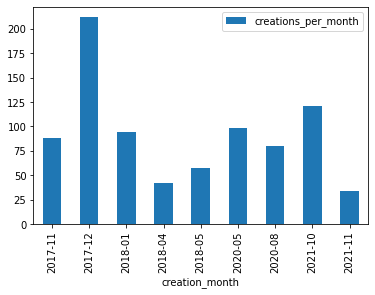

In [ ]:
sql("""SELECT creation_month, 
    COUNT(*) 
    AS creations_per_month
    FROM df
    GROUP BY creation_month;""").plot.bar(x='creation_month');